In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
folder = "/home/luigi/Documents/scripts/test_scripts/infotime"

In [3]:
prova = {}
prova_time = prova.keys()

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

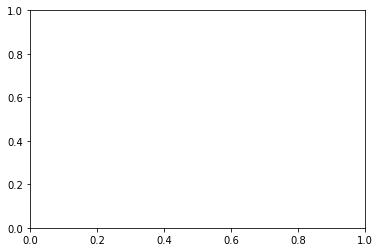

In [4]:

total_num_robot = 0
number_of_robots = 6
sim_or_real = "sim"
arena_size = "0.95"

complete_time_dict = {}
for directory, dirs, files in os.walk(folder):
    for element in files:
        if element.endswith('.tsv'):
            complete_time_dict, total_num_robot = first_discovery(
                directory, element, number_of_robots, total_num_robot, complete_time_dict, sim_or_real)
        else:
            continue

times = complete_time_dict.keys()
#times.append(0)
times = sorted(times)
values = [0]
cummulate = 0
for key in times[1:]:
   cummulate += complete_time_dict[key]/total_num_robot
   values.append(cummulate)
times = [float(i)/tick_per_second for i in times]

plt.plot(times, values, linewidth=3, color='b')
plt.xlabel("Time in seconds")
plt.ylabel("proportion of discovery")
plt.title("Arena diameter: " + arena_size + "m " +
         str(number_of_robots) + " kilobots per run, " + '''str(w_displacement_run_count) +''' " runs")
plt.legend()
plt.savefig(folder + "/DiscoveryProportion_" + str(number_of_robots) + "kilobots_" +
           '''str(w_displacement_run_count) +''' " runs.png", bbox_inches='tight', dpi=200, orientation="landscape")
# plt.show(block=False)
plt.close()

In [5]:
folder = "/home/luigi/Documents/scripts/test_scripts/infotime"
time_filename = "infotime_1.2_0.6_2.tsv"
num_robots = 6
kilobot_ticks_per_second = 10

complete_filename = folder + "/" + time_filename

time_file = open(complete_filename, mode='r')
tsvin = csv.reader(time_file, delimiter='\t')

discovery_times = {}
for row in tsvin:
    if(row[0] == "Robot id"):
        continue
    else:
        if(len(row) < 3):
            print(complete_filename)
        discovery = int(row[1])
        if(discovery > 0):
            if(not discovery in discovery_times):
                discovery_times[discovery] = 1.0/num_robots
            else:
                discovery_times[discovery] += 1.0/num_robots

            if(not discovery in complete_time_dict):
                complete_time_dict[discovery] = 1.0
            else:
                complete_time_dict[discovery] += 1.0
                

times = discovery_times.keys()
# times.append(0)
times = sorted(times)
values = [0]
cummulate = 0
for key in times[1:]:
    cummulate += discovery_times[key]
    values.append(cummulate)
if(sim_or_real == "real"):
    tick_per_second = 2
else:
    tick_per_second = kilobot_ticks_per_second

times = [float(i)/tick_per_second for i in times]
# plt.plot(times, values, linewidth=0.5, linestyle='dashed')
total_number_of_robots = num_robots

# return (complete_time_dict, total_number_of_robots)

FileNotFoundError: [Errno 2] No such file or directory: '/home/luigi/Documents/scripts/test_scripts/infotime/infotime_1.2_0.6_2.tsv'

In [6]:
times

[]

In [58]:
def first_discovery(folder, time_filename, num_robots, total_number_of_robots, complete_time_dict, sim_or_real):
    complete_filename = folder + "/" + time_filename
    time_file = open(complete_filename, mode='r')
    tsvin = csv.reader(time_file, delimiter='\t')

    discovery_times = {}
    for row in tsvin:
        if(row[0] == "Robot id"):
            continue
        else:
            if(len(row) < 3):
                print(complete_filename)
            discovery = int(row[1])
            if(discovery > 0):
                if(not discovery in discovery_times):
                    discovery_times[discovery] = 1.0/num_robots
                else:
                    discovery_times[discovery] += 1.0/num_robots

                if(not discovery in complete_time_dict):
                    complete_time_dict[discovery] = 1.0
                else:
                    complete_time_dict[discovery] += 1.0

    times = discovery_times.keys()
    # times.append(0)
    times = sorted(times)
    values = [0]
    cummulate = 0
    for key in times[1:]:
        cummulate += discovery_times[key]
        values.append(cummulate)
    if(sim_or_real == "real"):
        tick_per_second = 2
    else:
        tick_per_second = kilobot_ticks_per_second

    times = [float(i)/tick_per_second for i in times]
    # plt.plot(times, values, linewidth=0.5, linestyle='dashed')
    total_number_of_robots += num_robots

    return (complete_time_dict, total_number_of_robots)